In [1]:
import time
import tensorflow as tf
import numpy as np
from scipy.misc import imread
from caffe_classes import class_names
from alexnet import AlexNet

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# The traffic signs are 32x32 so you
# have to resize them to be 227x227 before
# passing them to AlexNet.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
images_227x227 = tf.image.resize_images(x, (227, 227))

probs = AlexNet(images_227x227)

In [3]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [4]:
# Read images from local directory
image_1 = imread("images/construction.jpg").astype(np.float32)
image_2 = imread("images/stop.jpg").astype(np.float32)

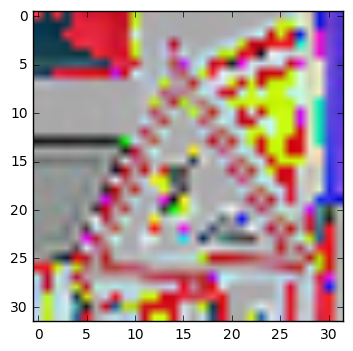

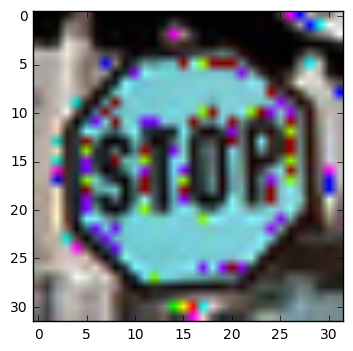

In [20]:
images = []
images.append(image_1)
images.append(image_2)

import matplotlib.cm as cm
import cv2

for image in images:
    plt.figure() 
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2HSV) )
    #plt.imshow(image[..., ::-1]  ) # red2blue
    plt.imshow( image )  #

In [6]:

image_1 = image_1 - np.mean(image_1)
image_2 = image_2 - np.mean(image_2)

In [7]:
# Run Inference
t = time.time()


In [8]:
probabilities = sess.run(probs, feed_dict={x: [image_1, image_2]})
print("probabilities.shape", probabilities.shape)
number_of_results = probabilities.shape[0]

# Print Output
for index in range(number_of_results):
    
    # Returns the indices that would sort an array.
    sorted_indices = np.argsort(probabilities)[index, :]
    print("Image", index + 1)
    
    # print 5 results
    for i in range(5):
        class_name = class_names[sorted_indices[-1 - i]]
        probability = probabilities[index, sorted_indices[-1 - i]]
        print("%s: \t %.3f" % (class_name, probability))
    print()

probabilities.shape (2, 1000)
Image 1
screen, CRT screen: 	 0.051
digital clock: 	 0.041
laptop, laptop computer: 	 0.030
balance beam, beam: 	 0.027
parallel bars, bars: 	 0.023

Image 2
digital watch: 	 0.395
digital clock: 	 0.275
bottlecap: 	 0.115
stopwatch, stop watch: 	 0.104
combination lock: 	 0.086



In [9]:
print("Time: %.3f seconds" % (time.time() - t))

Time: 0.131 seconds
